# Shoulder Peak Finder

This function accepts a list of y values, and then calculates the first and second order differential. If the first order differential is positive, then the shoulder will be present when the second order differential is positive as well. If the first order differential is negative, then the shoulder will be present when the second order differential is negative as well. 

A simple case of this is shown in the first example. A more complex case is shown in the second example

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

def index_return(y_list, returnInflection=False, returnPeak=True):
    '''
Input a y list, and peak_shoulder_finder will return a list of indexes for all
inflection points and all peaks

inflection_points_index, peaks_index = peak_shoulder_finder(y_list)

'''

    # calculate the first and second derivatives of the y list
    dy = np.diff(y_list)
    dydy = np.diff(dy)

    # convert values to list and dataframe
    y_list = y_list[2:].tolist()
    dy_list = dy[1:].tolist()
    dydy_list = dydy.tolist()
    all_lists = pd.DataFrame(
        {'y': y_list,
         'dy': dy_list,
         'dydy': dydy_list})

    inflection_points_index = []
    peaks_index = []

    for i in range(0, len(all_lists)-1):

        #calculate the directions of the first and second derivatives
        #if the first and second derivate pass through zero from positive to negative or vice versa
        first_derivative = all_lists.iloc[i-1]['dy'] >= 0 >= all_lists.iloc[i]['dy']
        first_derivative_positive = all_lists.iloc[i-1]['dy'] > 0
        first_derivative_negative = all_lists.iloc[i-1]['dy'] < 0
        second_derivative_positive = all_lists.iloc[i-1]['dydy'] <= 0 <= all_lists.iloc[i]['dydy']
        second_derivative_negative = all_lists.iloc[i-1]['dydy'] >= 0 >= all_lists.iloc[i]['dydy']

        #add the desired first and second derivatives to a list
        #if the first order differential is positive, then the shoulder will be present when 
        #the second order differential is positive as well. If the first order differential is 
        #negative, then the shoulder will be present when the second order differential is negative as well. 
        if first_derivative:
            peaks_index.append(i)
        if first_derivative_positive and second_derivative_positive:
            inflection_points_index.append(i)
        if not first_derivative_positive and second_derivative_negative:
            inflection_points_index.append(i)
        
    if returnInflection and returnPeak:
        return inflection_points_index, peaks_index
    elif returnInflection:
        return inflection_points_index
    elif returnPeak:
        return peaks_index
    
    return inflection_points_index, peaks_index

### Example 1: Using an artifically created dataset

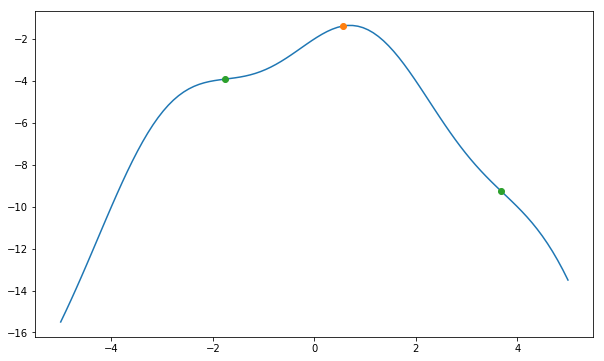

In [9]:
# using an artificial dataset
pts=100 
x=np.linspace(-5,5,num=pts)
yactual_1 = np.sin(x * 0.5*np.pi)
yactual_2 = -(0.5 * (x-2))**2
yactual_3 = -(0.5* (x+2))**2
yactual_4 = yactual_1 + yactual_2 + yactual_3

inflection_points_index_1, peaks_index_1 = index_return(yactual_4, returnInflection=True, returnPeak=True)

pyplot.figure(figsize=(10,6))
pyplot.plot(x, yactual_4)
pyplot.plot(x[peaks_index_1], yactual_4[peaks_index_1], 'o')
pyplot.plot(x[inflection_points_index_1], yactual_4[inflection_points_index_1], 'o')

### Example 2: Using a real, noisy, dataset

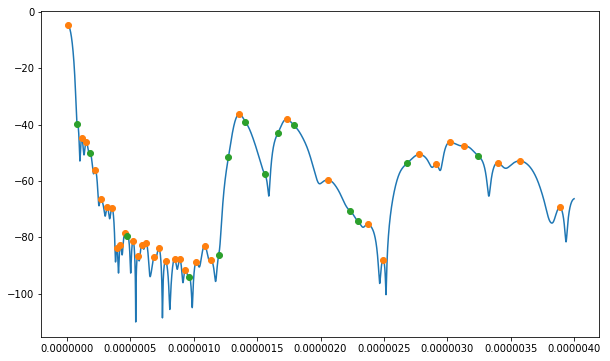

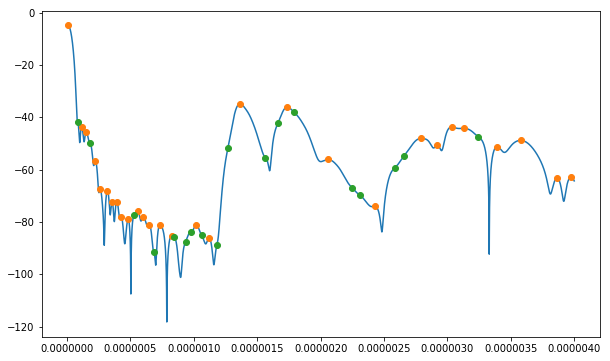

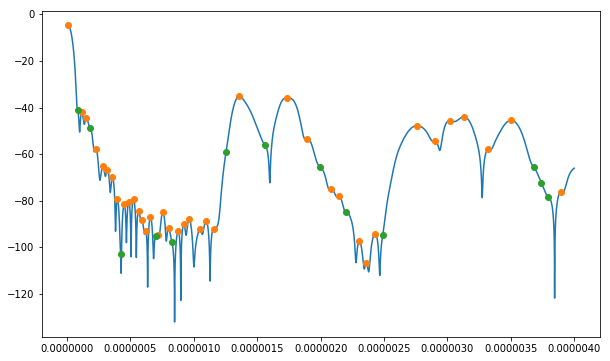

In [21]:
# file 1

file_1 = pd.read_csv('JaganData/3C4-S11td-072817.dat', names = ['x', 'y' , 'bad'], skiprows = 3)
file_1 = file_1[['x', 'y']]
inflection_points_index_1, peaks_index_1 = index_return(file_1['y'], returnInflection=True, returnPeak=True)

pyplot.figure(figsize=(10,6))
pyplot.plot(file_1['x'], file_1['y'])
pyplot.plot(file_1['x'][peaks_index_1], file_1['y'][peaks_index_1], 'o')
pyplot.plot(file_1['x'][inflection_points_index_1], file_1['y'][inflection_points_index_1], 'o')

# file 2

file_2 = pd.read_csv('JaganData/4C4-S11td-072817.dat', names = ['x', 'y' , 'bad'], skiprows = 3)
file_2 = file_2[['x', 'y']]
inflection_points_index_2, peaks_index_2 = index_return(file_2['y'], returnInflection=True, returnPeak=True)

pyplot.figure(figsize=(10,6))
pyplot.plot(file_2['x'], file_2['y'])
pyplot.plot(file_2['x'][peaks_index_2], file_2['y'][peaks_index_2], 'o')
pyplot.plot(file_2['x'][inflection_points_index_2], file_2['y'][inflection_points_index_2], 'o')

# file 3

file_3 = pd.read_csv('JaganData/5C4-S11td-072817.dat', names = ['x', 'y' , 'bad'], skiprows = 3)
file_3 = file_3[['x', 'y']]
inflection_points_index_3, peaks_index_3 = index_return(file_3['y'], returnInflection=True, returnPeak=True)

pyplot.figure(figsize=(10,6))
pyplot.plot(file_3['x'], file_3['y'])
pyplot.plot(file_3['x'][peaks_index_3], file_3['y'][peaks_index_3], 'o')
pyplot.plot(file_3['x'][inflection_points_index_3], file_3['y'][inflection_points_index_3], 'o')